A Cascade Classifier in OpenCV is a machine learning-based approach for object detection. It is primarily used for detecting objects in images or video streams, such as faces, eyes, pedestrians, and other objects. The classifier is trained using a large number of positive and negative images, and it uses a cascade of simple classifiers (stages) to detect objects efficiently.

Cascade Classifiers in OpenCV are powerful tools for object detection. They are efficient and can detect objects in real-time applications. By using pre-trained classifiers, you can quickly implement object detection in your projects.

In [33]:
import cv2
classifier= cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [5]:
vid = cv2.VideoCapture(0)
while 1:
    _,img = vid.read()
    faces=classifier.detectMultiScale(img,scaleFactor=1.1,minNeighbors=3,minSize=(30,30))
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(img,'Face Detected',(x-5,y-5),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow('face-detected',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()
    

array([[[162, 166, 157],
        [161, 165, 156],
        [158, 162, 153],
        ...,
        [180, 183, 185],
        [179, 183, 185],
        [179, 183, 185]],

       [[160, 164, 156],
        [161, 165, 157],
        [160, 164, 156],
        ...,
        [178, 182, 184],
        [178, 182, 184],
        [177, 182, 184]],

       [[160, 164, 160],
        [162, 166, 162],
        [161, 165, 161],
        ...,
        [176, 180, 182],
        [177, 182, 184],
        [177, 183, 185]],

       ...,

       [[124, 126, 126],
        [124, 127, 127],
        [123, 128, 127],
        ...,
        [ 85, 115, 133],
        [ 91, 120, 138],
        [ 90, 119, 137]],

       [[124, 129, 128],
        [125, 130, 129],
        [123, 131, 128],
        ...,
        [ 86, 114, 131],
        [ 92, 121, 139],
        [ 90, 119, 137]],

       [[121, 126, 124],
        [122, 128, 126],
        [121, 130, 127],
        ...,
        [ 85, 113, 130],
        [ 92, 121, 139],
        [ 88, 117, 135]]

In [29]:
vid = cv2.VideoCapture(0)
while 1:
    _,img = vid.read()
    
    mul = classifier.detectMultiScale2(img)
    
    print(mul)
    if len(mul)<=3:
        continue
    for x,y,w,h in mul:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
       
    
    cv2.imshow('mul',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()
    

((), ())
((), ())
((), ())
((), ())
((), ())
(array([[295, 109, 215, 215]]), array([4]))
((), ())
(array([[308, 115, 196, 196]]), array([21]))
(array([[309, 115, 196, 196]]), array([19]))
(array([[309, 118, 194, 194]]), array([24]))
(array([[310, 119, 190, 190]]), array([25]))
(array([[311, 117, 190, 190]]), array([25]))
(array([[311, 117, 192, 192]]), array([24]))
(array([[309, 123, 188, 188]]), array([29]))
(array([[309, 117, 193, 193],
       [233, 156, 115, 115]]), array([29,  5]))
(array([[312, 119, 192, 192]]), array([29]))
(array([[315, 122, 188, 188]]), array([33]))
(array([[319, 119, 188, 188]]), array([32]))
(array([[321, 121, 188, 188]]), array([34]))
(array([[319, 119, 190, 190]]), array([30]))
(array([[319, 119, 190, 190]]), array([30]))
(array([[318, 121, 188, 188]]), array([30]))
(array([[316, 119, 190, 190]]), array([30]))
(array([[316, 121, 190, 190],
       [231, 155, 118, 118]]), array([32,  4]))
(array([[318, 123, 188, 188],
       [233, 158, 112, 112]]), array([29,

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


croping image from detection

In [1]:
import cv2
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [2]:
vid = cv2.VideoCapture(0)

while 1:
    _,img = vid.read()
    faces = classifier.detectMultiScale(img,1.1,3)
    
    
    for x,y,w,h in faces:
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        
        crop =  img[y:y+h,x:x+w]
        
        cv2.imshow('detect-faces',img)
        cv2.imshow('crop',crop)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()
    
    

fixed cropping using max_area

In [3]:
vid = cv2.VideoCapture(0)

while 1:
    _,img = vid.read()
    faces = classifier.detectMultiScale(img,1.1,3)
    
    max_area=0
    crop_max = None
    for x,y,w,h in faces:
        area = w*h
        if area>max_area:
            max_area=area
            crop_max=(x,y,w,h)
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        
        
        crop =  img[y:y+h,x:x+w]
        
    cv2.imshow('detect-faces',img)
    if crop_max:
        x,y,w,h=crop_max
        crop_face = img[y:y+w,x:x+h]
        cv2.imshow('crop',crop_face)
       
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()
    
    

In [61]:
img[0]
img[0][0]

array([186, 179, 179], dtype=uint8)

In [62]:
import matplotlib.pyplot as plt
crop

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [173, 180, 173],
        ...,
        [172, 179, 172],
        [172, 179, 173],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [106, 116, 103],
        ...,
        [106, 123, 107],
        [106, 123, 107],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [106, 115, 102],
        ...,
        [105, 120, 105],
        [106, 121, 106],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

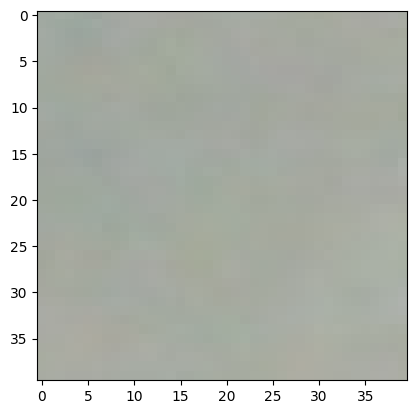

In [65]:

size = img[y:y+h,x:x+w]
plt.imshow(size)
